# Events Germany

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [178]:
from scipy.ndimage import gaussian_filter
from sklearn.decomposition import NMF

In [179]:
# Notes:
bayern_wyid = 2444

## Load Events

In [180]:
df_events = pd.read_csv('event_streams/events_germany.csv')
df_events.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,tagsList,pos_orig_y,pos_orig_x,pos_dest_y,pos_dest_x
0,8,Simple pass,[{'id': 1801}],15231,"[{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]",2516739,Pass,2446,1H,2.409746,85.0,179896442,[1801],50,50,48,50
1,8,Simple pass,[{'id': 1801}],14786,"[{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]",2516739,Pass,2446,1H,2.506082,85.0,179896443,[1801],48,50,22,22
2,8,Simple pass,[{'id': 1801}],14803,"[{'y': 22, 'x': 22}, {'y': 46, 'x': 6}]",2516739,Pass,2446,1H,6.946706,85.0,179896444,[1801],22,22,46,6
3,8,Simple pass,[{'id': 1801}],14768,"[{'y': 46, 'x': 6}, {'y': 10, 'x': 20}]",2516739,Pass,2446,1H,10.786491,85.0,179896445,[1801],46,6,10,20
4,8,Simple pass,[{'id': 1801}],14803,"[{'y': 10, 'x': 20}, {'y': 4, 'x': 27}]",2516739,Pass,2446,1H,12.684514,85.0,179896446,[1801],10,20,4,27


In [181]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519357 entries, 0 to 519356
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   eventId       519357 non-null  int64  
 1   subEventName  518138 non-null  object 
 2   tags          519357 non-null  object 
 3   playerId      519357 non-null  int64  
 4   positions     519357 non-null  object 
 5   matchId       519357 non-null  int64  
 6   eventName     519357 non-null  object 
 7   teamId        519357 non-null  int64  
 8   matchPeriod   519357 non-null  object 
 9   eventSec      519357 non-null  float64
 10  subEventId    518138 non-null  float64
 11  id            519357 non-null  int64  
 12  tagsList      468651 non-null  object 
 13  pos_orig_y    519357 non-null  int64  
 14  pos_orig_x    519357 non-null  int64  
 15  pos_dest_y    519357 non-null  int64  
 16  pos_dest_x    519357 non-null  int64  
dtypes: float64(2), int64(9), object(6)
memory usage:

#### Drop missing values

In [182]:
# Drop missing values
df_events = df_events.dropna()
df_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 468629 entries, 0 to 519356
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   eventId       468629 non-null  int64  
 1   subEventName  468629 non-null  object 
 2   tags          468629 non-null  object 
 3   playerId      468629 non-null  int64  
 4   positions     468629 non-null  object 
 5   matchId       468629 non-null  int64  
 6   eventName     468629 non-null  object 
 7   teamId        468629 non-null  int64  
 8   matchPeriod   468629 non-null  object 
 9   eventSec      468629 non-null  float64
 10  subEventId    468629 non-null  float64
 11  id            468629 non-null  int64  
 12  tagsList      468629 non-null  object 
 13  pos_orig_y    468629 non-null  int64  
 14  pos_orig_x    468629 non-null  int64  
 15  pos_dest_y    468629 non-null  int64  
 16  pos_dest_x    468629 non-null  int64  
dtypes: float64(2), int64(9), object(6)
memory usage: 64.4

## Load Players

In [183]:
df_players = pd.read_csv('event_streams/players.csv', encoding='utf-8')
df_players.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,NaN,Tekin,4502.0,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687.0
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,NaN,Sarr,3775.0,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423.0
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,NaN,Mandanda,3772.0,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,NaN,O. Mandanda,NaN
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,NaN,N'Diaye,683.0,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314.0
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,NaN,Konat\u00e9,2975.0,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,NaN


In [184]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3603 entries, 0 to 3602
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passportArea           3603 non-null   object 
 1   weight                 3603 non-null   int64  
 2   firstName              3603 non-null   object 
 3   middleName             0 non-null      float64
 4   lastName               3603 non-null   object 
 5   currentTeamId          3468 non-null   float64
 6   birthDate              3603 non-null   object 
 7   height                 3603 non-null   int64  
 8   role                   3603 non-null   object 
 9   birthArea              3603 non-null   object 
 10  wyId                   3603 non-null   int64  
 11  foot                   3551 non-null   object 
 12  shortName              3603 non-null   object 
 13  currentNationalTeamId  1357 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 394.2+ 

#### Map playerID to 8-Tuple:
* TeamID
* First Name
* Last Name
* Role
* Foot
* Height
* Weight

In [185]:
players = {row['wyId']: (
    row['currentTeamId'],
    row['firstName'],
    row['lastName'],
    row['role'],
    row['foot'],
    row['height'],
    row['weight'])
    for _, row in df_players.iterrows()}

## Load Clubs

In [186]:
df_teams = pd.read_csv('event_streams/teams.csv', encoding='utf-8')
df_teams.head()

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


In [187]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          142 non-null    object
 1   name          142 non-null    object
 2   wyId          142 non-null    int64 
 3   officialName  142 non-null    object
 4   area          142 non-null    object
 5   type          142 non-null    object
dtypes: int64(1), object(5)
memory usage: 6.8+ KB


#### Map TeamID to Team Name

In [188]:
# Map wyscout-id to team name
team_names = dict(zip(df_teams.wyId, df_teams.officialName))

#### Map TeamID to a list of its player ids

In [189]:
# Map teamID's to a list of its player ids
teams = {teamID: [playerID for playerID in players if teamID == players[playerID][0]] for teamID in team_names}

## Building Player Vectors

#### Select relevant action types:
* Pass
* Shot
* Ground Attacking Duell (since there is no dribble action)
* Cross

In [190]:
# Extracting relevant action types from dataframe
df_pass = df_events.loc[df_events['subEventName'] == 'Simple pass']
df_shot = df_events.loc[df_events['subEventName'] == 'Shot']
df_cross = df_events.loc[df_events['subEventName'] == 'Cross']
df_duell = df_events.loc[df_events['subEventName'] == 'Ground attacking duell']

In [191]:
# Group player by 'player_id', store actions coordinates in lists
passes = df_pass.groupby(['playerId']).agg({'pos_orig_x': list, 'pos_orig_y': list})
shots = df_shot.groupby(['playerId']).agg({'pos_orig_x': list, 'pos_orig_y': list})
crosses = df_pass.groupby(['playerId']).agg({'pos_orig_x': list, 'pos_orig_y': list})
duells = df_cross.groupby(['playerId']).agg({'pos_orig_x': list, 'pos_orig_y': list})

In [192]:
passes.head()

,pos_orig_x,pos_orig_y
playerId,,
0,"[52, 60, 30]","[79, 13, 39]"
77,"[100, 76, 100, 28, 12, 62, 27, 46, 29, 19, 67,...","[100, 73, 100, 6, 5, 83, 6, 24, 40, 61, 12, 57..."
91,"[75, 31, 67, 80, 34, 30, 36, 78, 90, 37, 72, 5...","[77, 64, 96, 89, 64, 10, 91, 29, 9, 74, 64, 30..."
110,"[87, 59, 37, 41, 96, 86, 63, 58, 55, 65, 66, 8...","[26, 4, 4, 5, 9, 4, 4, 4, 16, 17, 25, 13, 8, 2..."
159,"[32, 30, 27, 12, 27, 21, 28, 32, 30, 29, 40, 4...","[61, 74, 59, 68, 69, 93, 56, 63, 61, 53, 70, 8..."


In [193]:
shots.head()

,pos_orig_x,pos_orig_y
playerId,,
77,"[38, 32, 20, 54, 75, 27, 89, 83, 36, 73, 75, 3...","[64, 49, 70, 50, 59, 42, 68, 25, 28, 22, 96, 1..."
91,"[76, 96, 46, 72, 70]","[7, 71, 55, 31, 68]"
110,"[90, 25, 11, 41, 55, 59, 100, 100, 37, 49, 44,...","[29, 27, 47, 26, 6, 22, 100, 100, 41, 4, 0, 63..."
159,"[0, 100, 89, 29, 5, 57, 32, 95, 4, 62, 74, 42,...","[0, 100, 67, 76, 56, 11, 49, 55, 58, 80, 36, 1..."
1722,"[100, 41, 49, 57, 59, 98]","[100, 77, 42, 32, 0, 88]"


In [194]:
crosses.head()

,pos_orig_x,pos_orig_y
playerId,,
0,"[52, 60, 30]","[79, 13, 39]"
77,"[100, 76, 100, 28, 12, 62, 27, 46, 29, 19, 67,...","[100, 73, 100, 6, 5, 83, 6, 24, 40, 61, 12, 57..."
91,"[75, 31, 67, 80, 34, 30, 36, 78, 90, 37, 72, 5...","[77, 64, 96, 89, 64, 10, 91, 29, 9, 74, 64, 30..."
110,"[87, 59, 37, 41, 96, 86, 63, 58, 55, 65, 66, 8...","[26, 4, 4, 5, 9, 4, 4, 4, 16, 17, 25, 13, 8, 2..."
159,"[32, 30, 27, 12, 27, 21, 28, 32, 30, 29, 40, 4...","[61, 74, 59, 68, 69, 93, 56, 63, 61, 53, 70, 8..."


In [195]:
duells.head()

,pos_orig_x,pos_orig_y
playerId,,
77,"[81, 90, 27, 72, 65, 43, 64, 18]","[77, 78, 28, 30, 77, 42, 15, 88]"
91,"[95, 72, 6]","[100, 9, 67]"
110,"[90, 75, 93, 84, 96, 88, 5, 94, 5, 62, 37, 100...","[12, 96, 6, 93, 93, 28, 88, 73, 5, 5, 94, 66, ..."
159,"[91, 91, 67, 52, 76, 18, 64, 54, 30, 100, 57, ...","[74, 96, 73, 60, 76, 48, 52, 12, 23, 100, 34, ..."
1722,"[28, 16, 47]","[72, 8, 0]"


### Heatmap parameters
* M, N: rows, columns of heatmap
* Sigma for gaussian blur
* Num of componnents in NMF


In [196]:
# Heatmap parameters
N, M = 25, 25 
sigma = 1.0
k = 4

### 1. Calculating Heatmaps

#### 1.1: Counting + Normalizing + Smoothing

In [197]:
heatmaps_shot = {}

# Counting and smoothing
for _, row in shots.iterrows():
    playerID = row.name
    x = row.pos_orig_x
    y = row.pos_orig_y
    
    # Counting via numpy 2d histogramm 
    X, _, _ = np.histogram2d(x, y, bins=[N, M])
    
    # Gaussian blur
    X = gaussian_filter(X, sigma=sigma) 
    heatmaps_shot[playerID] = X

#### Visualize Heatmaps for Bayern Muenchen

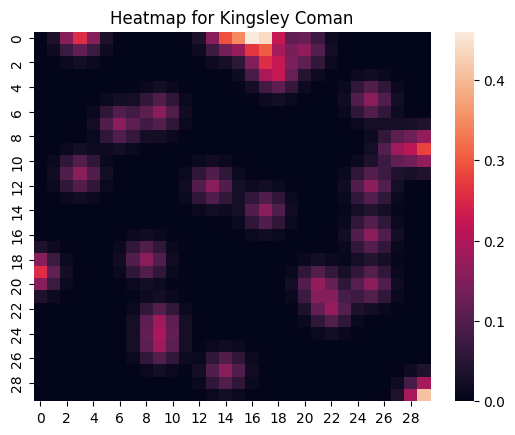

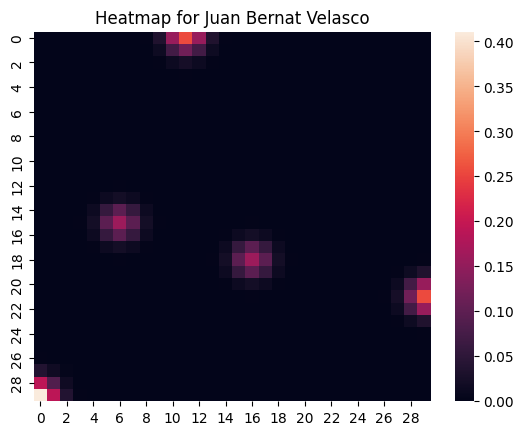

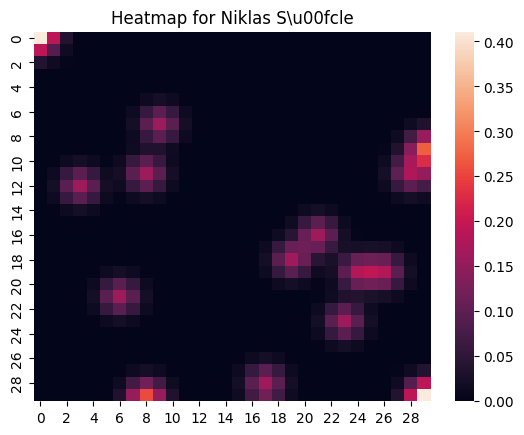

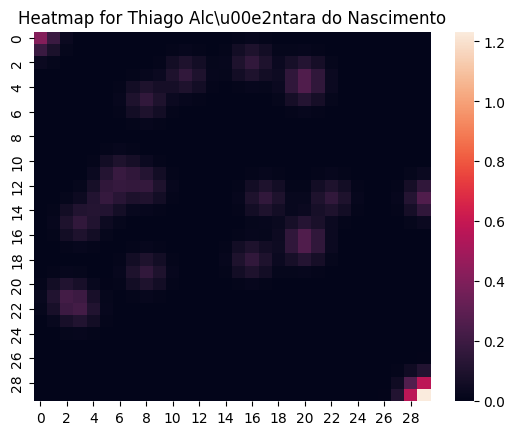

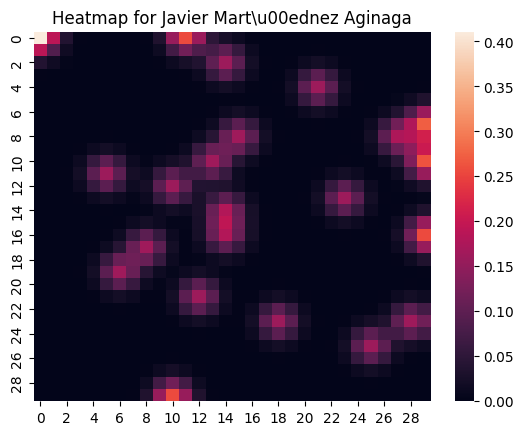

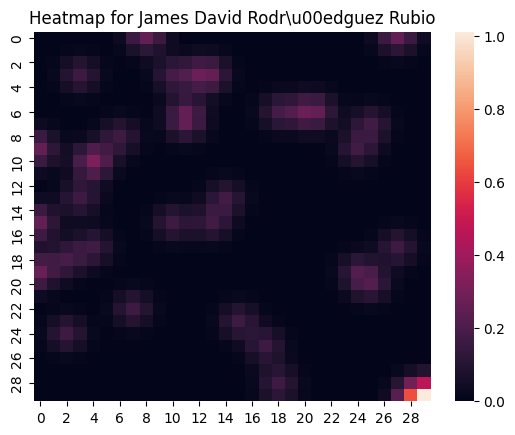

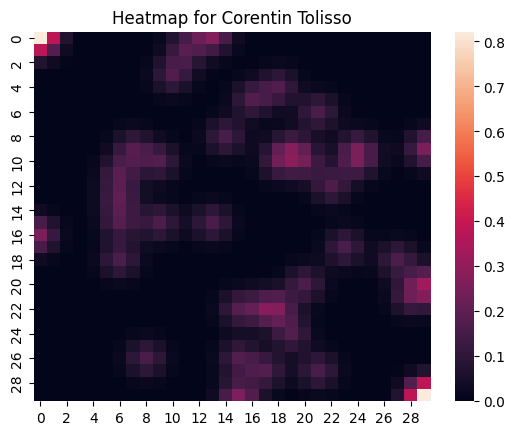

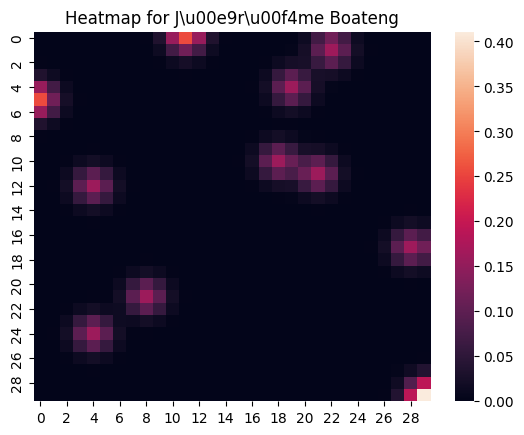

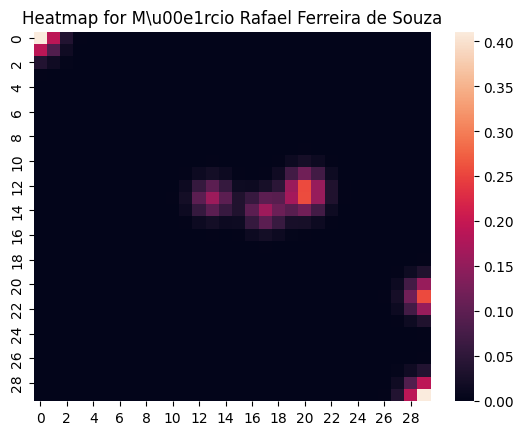

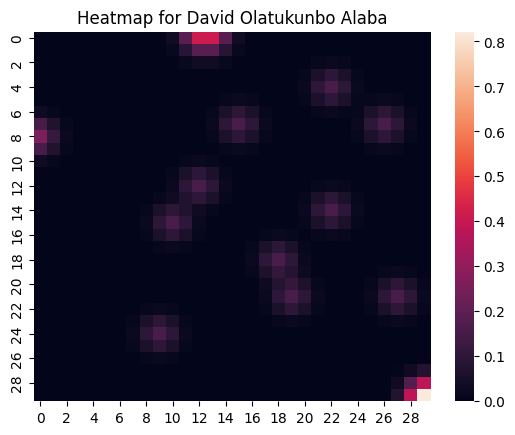

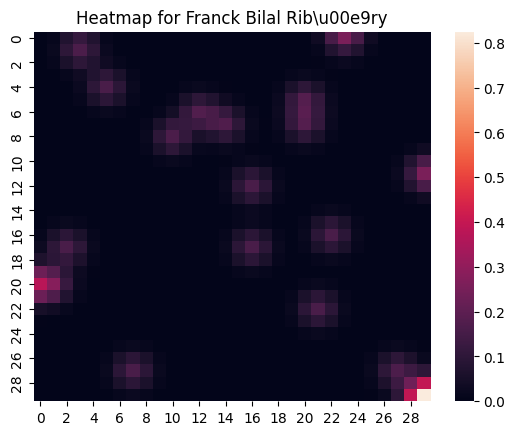

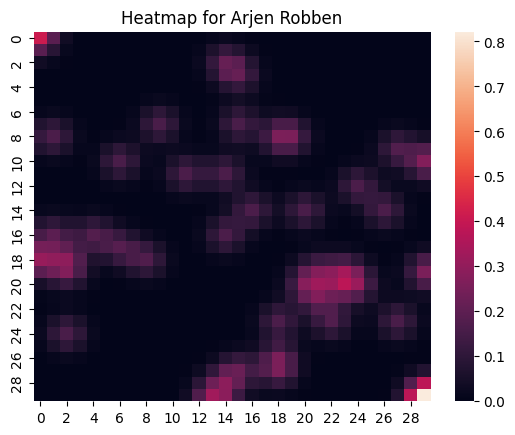

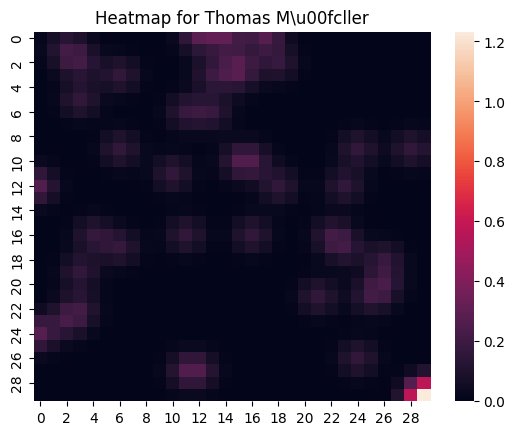

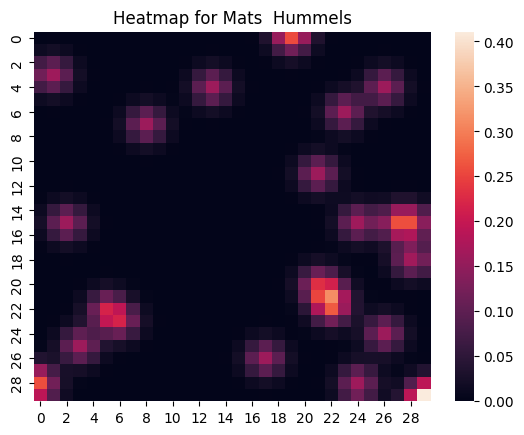

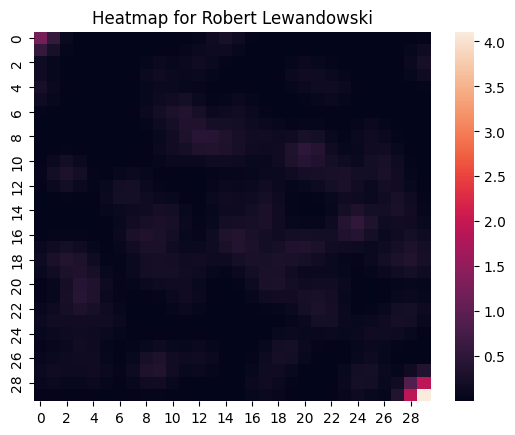

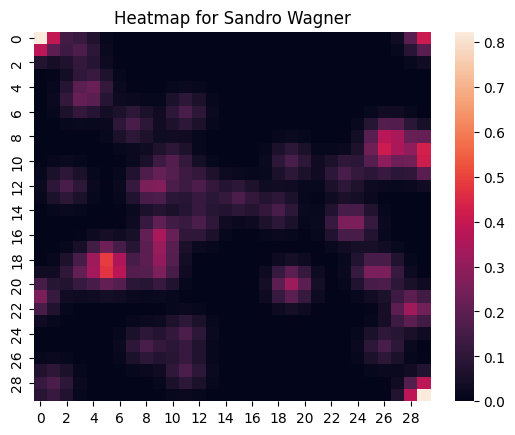

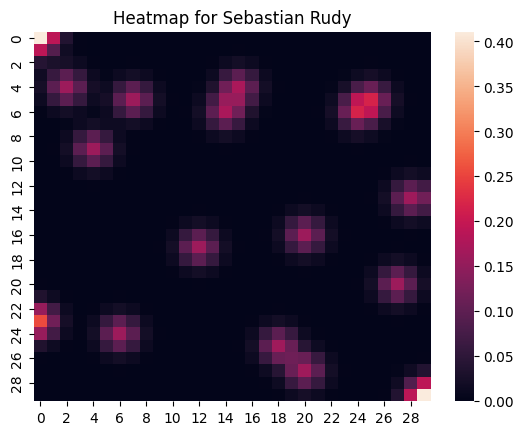

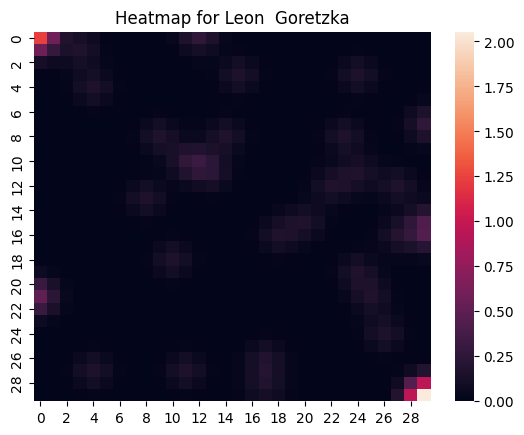

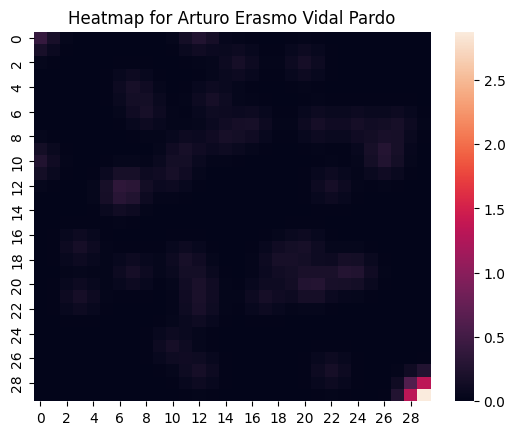

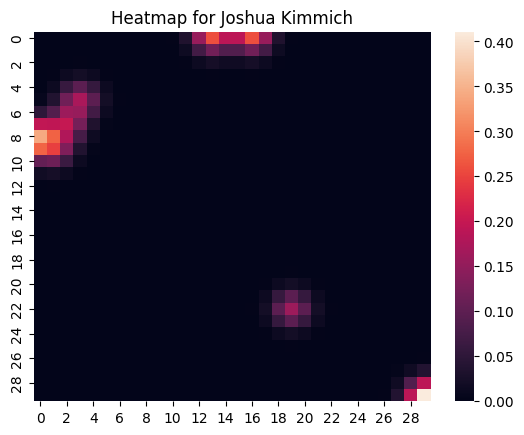

In [198]:
for playerID in teams[bayern_wyid]:
    if playerID in heatmaps_shot:
        X = heatmaps_shot[playerID]
        plt.title(f'Heatmap for {players[playerID][1]} {players[playerID][2]}') 
        sns.heatmap(X)
        plt.show()